# InvisiFraud: Fraud Intelligence System

# Capstone Project: Final Review

## Sai Bhere
## U01885436

### Libraries
**Numpy (np):** An essential package for scientific computations in Python, providing support for managing large, multi-dimensional arrays and matrices. Additionally, it offers a comprehensive set of high-level mathematical functions tailored for array operations.

**Pandas (pd):** A versatile open-source library designed for data manipulation and analysis tasks. It facilitates handling numerical tables and time series data structures, streamlining data manipulation and analysis workflows.

**Seaborn (sns):** A Python-based data visualization library built upon matplotlib, offering a simplified interface for generating aesthetically pleasing and insightful statistical graphics.

**Matplotlib.pylab (plt):** A component of the Matplotlib library, it delivers a procedural interface to the matplotlib object-oriented plotting library. This tool is utilized for crafting static, animated, and interactive visualizations within Python.

**train_test_split:** A Scikit-learn function enabling the easy splitting of datasets into random train and test subsets, ensuring that models have unseen data for validation.

**StandardScaler:** A preprocessing utility from Scikit-learn that standardizes features by removing the mean and scaling to unit variance, a common requirement for many machine learning algorithms.

**confusion_matrix, accuracy_score, roc_curve, auc, classification_report:** A collection of metrics from Scikit-learn used to evaluate the quality and performance of classification models, helping in understanding model effectiveness.

**resample:** A Scikit-learn utility for resampling datasets, it’s instrumental when working with imbalanced data by allowing both oversampling of the minority class and undersampling of the majority class.

**Random Forest Classifier:** A Scikit-learn ensemble method that fits multiple decision trees to various sub-samples, improving model accuracy and control over overfitting.

**Logistic Regression:** A Scikit-learn classifier that estimates the likelihood of class membership and is appropriate for binary or multiclass classification tasks.

**KNeighbors Classifier:** The instance-based or memory-based learning algorithm of Scikit-learn, which is used for both classification and regression.

**Decision Tree Classifier:** A classifier in Scikit-learn that maps features to inferences about the target value using a decision tree as a prediction model.

**RandomOverSampler:** The imbalanced-learn library's tool that aids with class balancing by selecting samples at random from the minority class to equal the number of instances in the majority class.

**Tensorflow (tf):** A powerful open-source toolkit that makes it possible to create, train, and implement a wide range of neural network and machine learning models.

**Sequential:** TensorFlow's linear layer stacking makes it simple to build models by adding layers one after the other.

**Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, and Dense:** TensorFlow's layers and functions are essential for building and fine-tuning neural network model architectures.

**EarlyStopping:** A TensorFlow callback that helps avoid model overfitting by providing a mechanism to halt training when a monitored quantity has ceased to improve.

**Warnings:** A module utilized for communicating various events such as deprecation, runtime issues, and user-defined warnings.

**Display Options and Settings:**

**warnings.filterwarnings('ignore'):** Suppresses warnings.

**%matplotlib inline:** A Jupyter magic command used to exhibit matplotlib plots within the notebook interface.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, recall_score,roc_auc_score, roc_curve, auc,precision_score,f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#new EDA
from sklearn.decomposition import PCA

### Importing Dataset & Data Preprocessing

In [4]:
data = pd.read_csv('credit_card.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Identifying and Removing Duplicate Rows

In [8]:
duplicate = data.duplicated()
print(duplicate.sum())

1081


In [9]:
data[duplicate]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [10]:
data.drop_duplicates(inplace=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### View Datatypes

In [11]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Statistical Summary

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Counting Unique Values in a Column

In [13]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

### Visualizing Fraudulant and Non-Fraudulant Transactions

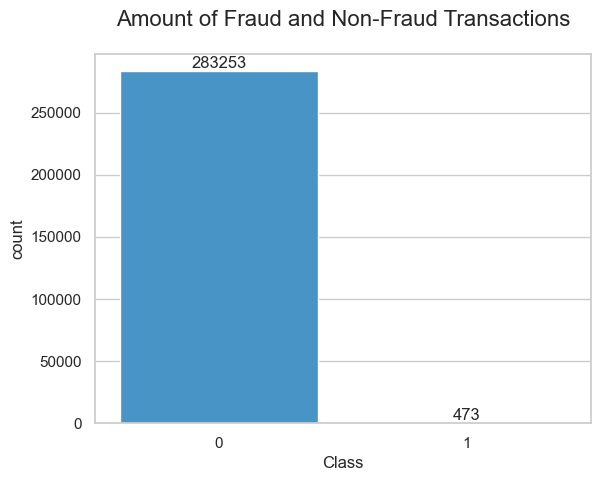

In [14]:

sns.set(style="whitegrid")
custom_colors = ['#3498db', '#e74c3c'] 
ax = sns.countplot(x='Class', data=data, order=[0, 1], label='Count', palette=custom_colors)
counts = data['Class'].value_counts()
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
title = "Amount of Fraud and Non-Fraud Transactions"
ax.set_title(title, size=16)
plt.title(title, size=16, pad=20)
plt.show()

### Heatmap Correlation Visualization

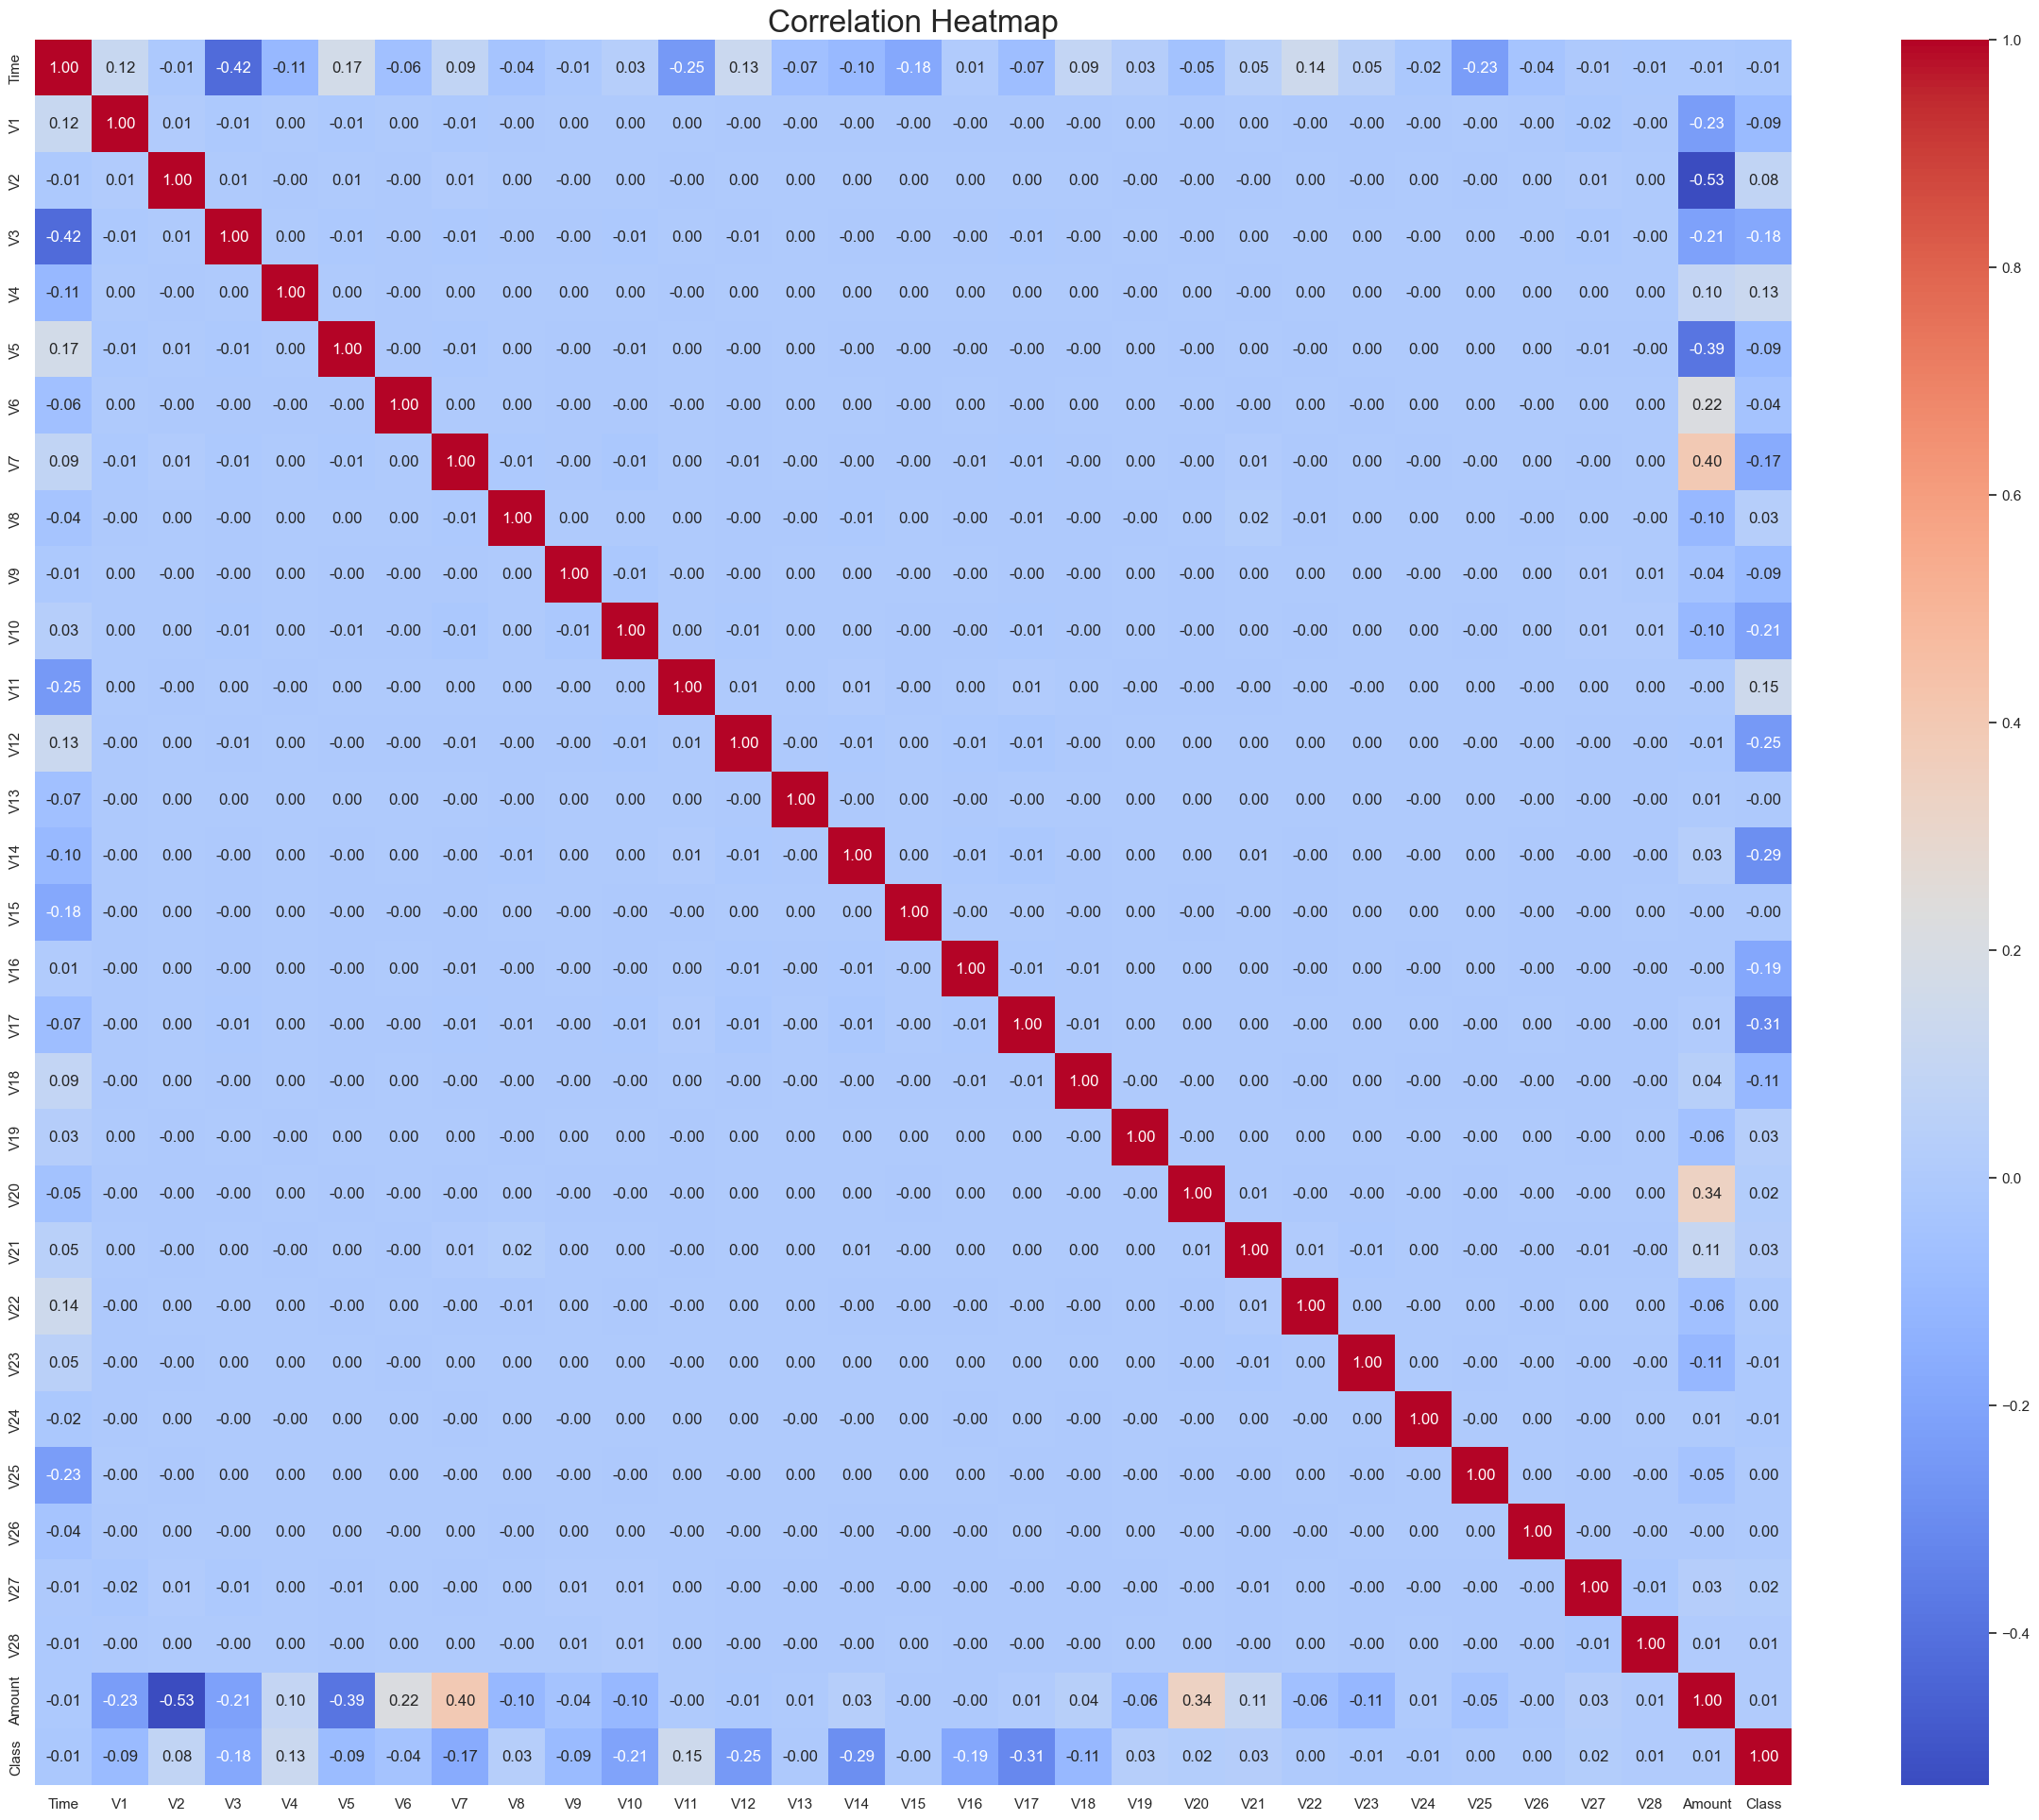

In [15]:
corr = data.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=24)
plt.show()

### Visualizing Correlation between Features and Target Classes

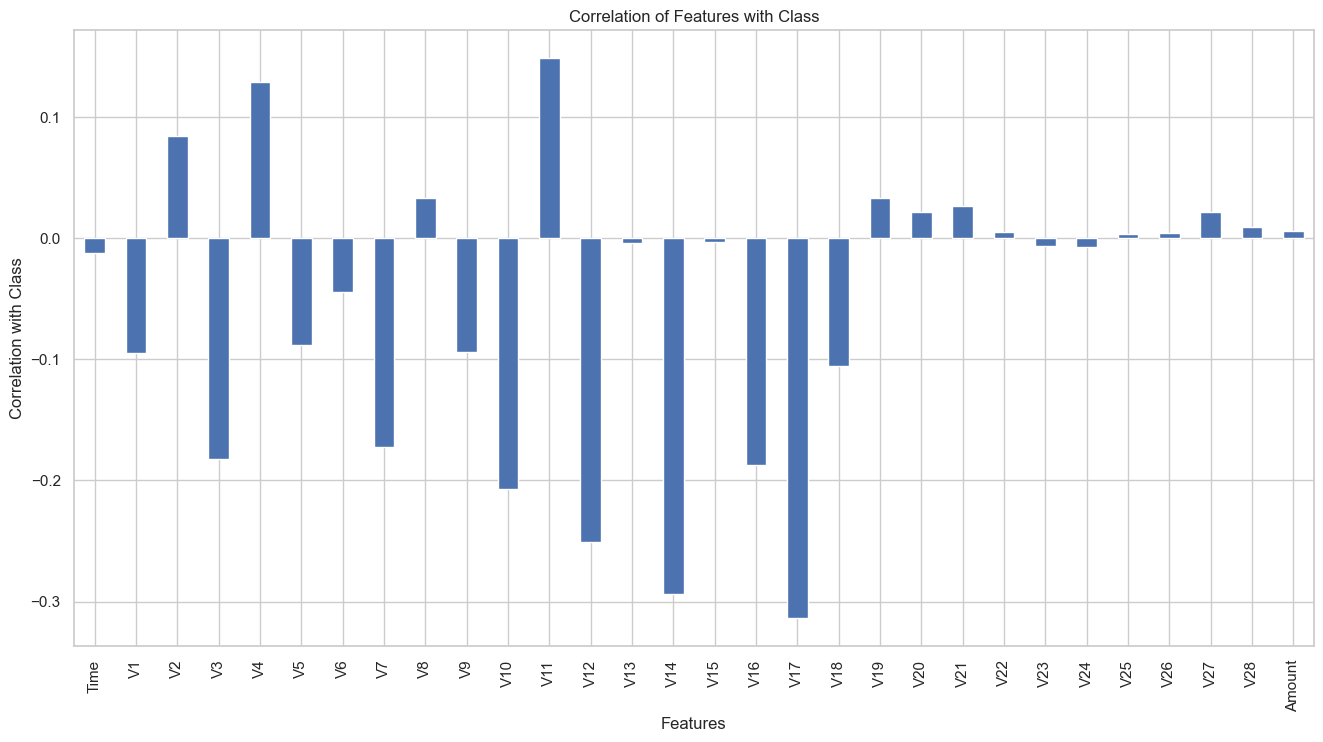

In [16]:
data2 = data.drop(columns=['Class'])
correlation_with_class = data2.corrwith(data['Class'])
correlation_with_class.plot.bar(figsize=(16, 8), grid=True)
plt.xlabel("Features")
plt.ylabel("Correlation with Class")
plt.title("Correlation of Features with Class")
plt.show()

### Calculating Feature-Target Correlation

In [17]:
target_column='Class'
# Calculate and print correlation of each feature with the target variable in percentages
for column in data.columns:
    if column != target_column:  # avoid comparing the target column with itself
        correlation = data[column].corr(data[target_column]) * 100  # convert to percentage
        print(f"Correlation of {column} with {target_column}: {correlation:.2f}%")

Correlation of Time with Class: -1.24%
Correlation of V1 with Class: -9.45%
Correlation of V2 with Class: 8.46%
Correlation of V3 with Class: -18.23%
Correlation of V4 with Class: 12.93%
Correlation of V5 with Class: -8.78%
Correlation of V6 with Class: -4.39%
Correlation of V7 with Class: -17.23%
Correlation of V8 with Class: 3.31%
Correlation of V9 with Class: -9.40%
Correlation of V10 with Class: -20.70%
Correlation of V11 with Class: 14.91%
Correlation of V12 with Class: -25.07%
Correlation of V13 with Class: -0.39%
Correlation of V14 with Class: -29.34%
Correlation of V15 with Class: -0.33%
Correlation of V16 with Class: -18.72%
Correlation of V17 with Class: -31.35%
Correlation of V18 with Class: -10.53%
Correlation of V19 with Class: 3.36%
Correlation of V20 with Class: 2.15%
Correlation of V21 with Class: 2.64%
Correlation of V22 with Class: 0.49%
Correlation of V23 with Class: -0.63%
Correlation of V24 with Class: -0.72%
Correlation of V25 with Class: 0.32%
Correlation of V26 

### Removing Negatively Correlated Features

In [18]:
target_column = 'Class'  # specify the target column

# Initialize a list to hold the names of the features to be dropped
columns_to_drop = []

# Calculate the correlation of each feature with the target variable
# and append negatively correlated features to the list
for column in data.columns:
    if column != target_column:  # avoid comparing the target column with itself
        correlation = data[column].corr(data[target_column])
        if correlation < 0:
            columns_to_drop.append(column)

# Drop the negatively correlated features from the dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Print the cleaned dataset
print(data_cleaned.head())

         V2        V4        V8       V11       V19       V20       V21  \
0 -0.072781  1.378155  0.098698 -0.551600  0.403993  0.251412 -0.018307   
1  0.266151  0.448154  0.085102  1.612727 -0.145783 -0.069083 -0.225775   
2 -1.340163  0.379780  0.247676  0.624501 -2.261857  0.524980  0.247998   
3 -0.185226 -0.863291  0.377436 -0.226487 -1.232622 -0.208038 -0.108300   
4  0.877737  0.403034 -0.270533 -0.822843  0.803487  0.408542 -0.009431   

        V22       V25       V26       V27       V28  Amount  Class  
0  0.277838  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1 -0.638672  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2  0.771679 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.005274  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4  0.798278 -0.206010  0.502292  0.219422  0.215153   69.99      0  


### Cleaned DataFrame

In [19]:
data_cleaned

,V2,V4,V8,V11,V19,V20,V21,V22,V25,V26,V27,V28,Amount,Class
0,-0.072781,1.378155,0.098698,-0.551600,0.403993,0.251412,-0.018307,0.277838,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.266151,0.448154,0.085102,1.612727,-0.145783,-0.069083,-0.225775,-0.638672,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.340163,0.379780,0.247676,0.624501,-2.261857,0.524980,0.247998,0.771679,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.185226,-0.863291,0.377436,-0.226487,-1.232622,-0.208038,-0.108300,0.005274,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.877737,0.403034,-0.270533,-0.822843,0.803487,0.408542,-0.009431,0.798278,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,10.071785,-2.066656,7.305334,-1.593105,-0.682920,1.475829,0.213454,0.111864,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.055080,-0.738589,0.294869,-0.150189,-1.545556,0.059616,0.214205,0.924384,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,-0.301254,-0.557828,0.708417,0.411614,-0.577252,0.001396,0.232045,0.578229,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,0.530483,0.689799,0.679145,-1.933849,2.897849,0.127434,0.265245,0.800049,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
data_cleaned.shape

(283726, 14)

### Splitting DataFrame

In [21]:
X = data.drop(labels='Class', axis=1)
Y = data['Class']

X.shape, Y.shape

((283726, 30), (283726,))

### Splitting into Training and Testing Sets

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(198608, 30) (198608,)
(85118, 30) (85118,)


In [23]:
# Undersampling
merged = pd.concat([xtrain,ytrain],axis = 1)

### Separating Majority and Minority Classes

In [24]:
majority_class = merged[merged['Class'] == 0]
minority_class = merged[merged['Class'] == 1]

### Determining Minority Class Count

In [25]:
minority_count = len(minority_class)

### Random Undersampling of Majority Class

In [26]:
majority_undersampled = resample(majority_class, replace=False, n_samples=minority_count, random_state=42)

### Combining Undersampled Majority and Minority Classes

In [27]:
undersampled_merged = pd.concat([majority_undersampled, minority_class])

In [28]:
X_undersample = undersampled_merged.drop("Class", axis = 1)
y_undersample = undersampled_merged["Class"]

### Random Oversampling

In [29]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(xtrain, ytrain)

In [30]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros,test_size = 0.3,random_state = 0)

### Comaparing Oversampling and Undersampling

In [32]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_undersample, y_undersample, test_size=0.3, random_state=0)

# Create classifier
clf = RandomForestClassifier(random_state=0)

# Train on undersampled data
clf.fit(X_train_under, y_train_under)
y_pred_under = clf.predict(X_test_under)

# Metrics for undersampled data
accuracy_under = accuracy_score(y_test_under, y_pred_under)
precision_under = precision_score(y_test_under, y_pred_under)
recall_under = recall_score(y_test_under, y_pred_under)
f1_under = f1_score(y_test_under, y_pred_under)

# Train on oversampled data
clf.fit(X_train_ros, y_train_ros)
y_pred_ros = clf.predict(X_test_ros)

# Metrics for oversampled data
accuracy_ros = accuracy_score(y_test_ros, y_pred_ros)
precision_ros = precision_score(y_test_ros, y_pred_ros)
recall_ros = recall_score(y_test_ros, y_pred_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)

# Compare
print("Undersampling Metrics")
print("Accuracy:", accuracy_under)
print("Precision:", precision_under)
print("Recall:", recall_under)
print("F1 score:", f1_under)

print("\nOversampling Metrics")
print("Accuracy:", accuracy_ros)
print("Precision:", precision_ros)
print("Recall:", recall_ros)
print("F1 score:", f1_ros)

# Decision-making
if f1_under > f1_ros:
    print("\nUndersampling gives a better F1 score. Proceed with undersampling.")
else:
    print("\nOversampling gives a better F1 score. Proceed with oversampling.")

Undersampling Metrics
Accuracy: 0.9411764705882353
Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1 score: 0.9433962264150944

Oversampling Metrics
Accuracy: 0.9999411576806039
Precision: 0.9998813941273149
Recall: 1.0
F1 score: 0.9999406935466105

Oversampling gives a better F1 score. Proceed with oversampling.


## ML Algorithms

### Logistic Regression

In [33]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [34]:
train=model.predict(xtrain)
test=model.predict(xtest)

In [35]:
tn, fp, fn, tp = confusion_matrix(ytest, test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,78,56
Not Fraud,21,84963


<Axes: >

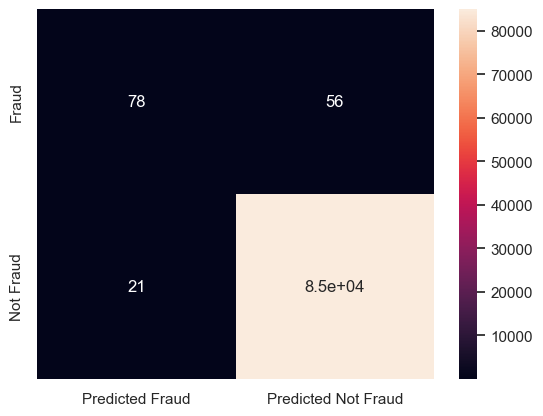

In [36]:
sns.heatmap(conf_matrix,annot=True)

In [37]:
lr_accuracy = accuracy_score(ytest, test)
lr_precision=precision_score(ytest,test)
lr_recall=recall_score(ytest,test)
lr_f1 = f1_score(ytest, test)

In [38]:
print("---------- classification report of logistic regression---------")
print(classification_report(ytest, test))

print("--------------- Accuracy of logistic regression ----------------")
print(f"Accuracy:- {lr_accuracy}")
print(f"Precision:- {lr_precision}")
print(f"Recall:- {lr_recall}")
print(f"F1-Score:- {lr_f1}")

---------- classification report of logistic regression---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.79      0.58      0.67       134

    accuracy                           1.00     85118
   macro avg       0.89      0.79      0.83     85118
weighted avg       1.00      1.00      1.00     85118

--------------- Accuracy of logistic regression ----------------
Accuracy:- 0.9990953734815198
Precision:- 0.7878787878787878
Recall:- 0.582089552238806
F1-Score:- 0.6695278969957081


In [39]:
lr_pred_test_prob = model.predict_proba(xtest)[:, 1]

In [40]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [41]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.8801547894529049

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

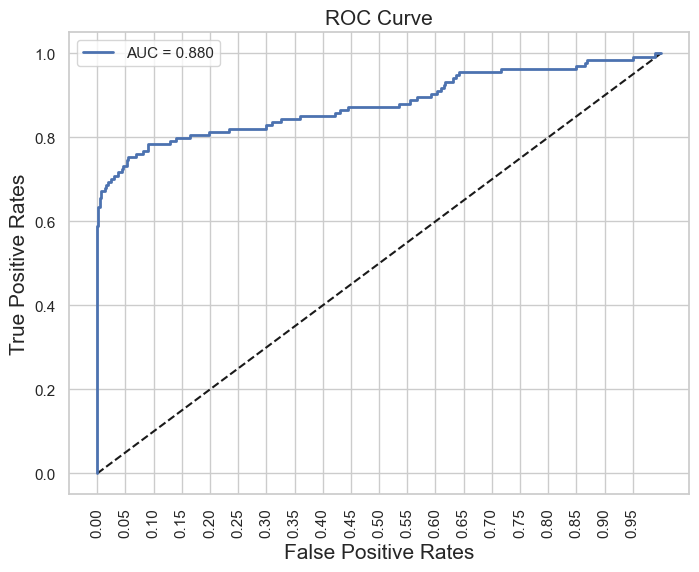

In [43]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

### Decision Tree

In [44]:
#decision tree
dt_model = DecisionTreeClassifier()

In [45]:
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [46]:
dt_pred_train = dt_model.predict(xtrain)
dt_pred_test = dt_model.predict(xtest)

In [47]:
tn, fp, fn, tp = confusion_matrix(ytest, dt_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,106,28
Not Fraud,42,84942


<Axes: >

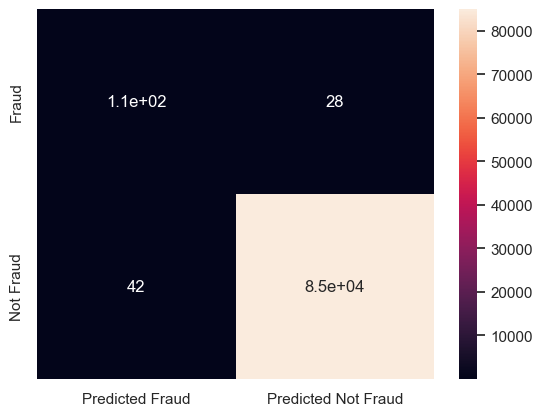

In [48]:
sns.heatmap(conf_matrix, annot=True)

In [49]:
dt_accuracy = accuracy_score(ytest, dt_pred_test)
dt_precision = precision_score(ytest, dt_pred_test)
dt_recall = recall_score(ytest, dt_pred_test)
dt_f1 = f1_score(ytest, dt_pred_test)

In [50]:
print("---------- classification report of decision tree---------")
print(classification_report(ytest, test))

print("-----------------Accuracy of decision tree----------------")
print(f"Accuracy:- {dt_accuracy}")
print(f"Precision:- {dt_precision}")
print(f"Recall:- {dt_recall}")
print(f"F1-Score:- {dt_f1}")

---------- classification report of decision tree---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.79      0.58      0.67       134

    accuracy                           1.00     85118
   macro avg       0.89      0.79      0.83     85118
weighted avg       1.00      1.00      1.00     85118

-----------------Accuracy of decision tree----------------
Accuracy:- 0.999177612255927
Precision:- 0.7162162162162162
Recall:- 0.7910447761194029
F1-Score:- 0.7517730496453902


In [51]:
dt_pred_test_prob = dt_model.predict_proba(xtest)[:, 1]

In [52]:
fpr, tpr, _ = roc_curve(ytest, dt_pred_test_prob)

In [53]:
dt_auc = roc_auc_score(ytest, dt_pred_test_prob)
dt_auc

0.8952752827222261

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

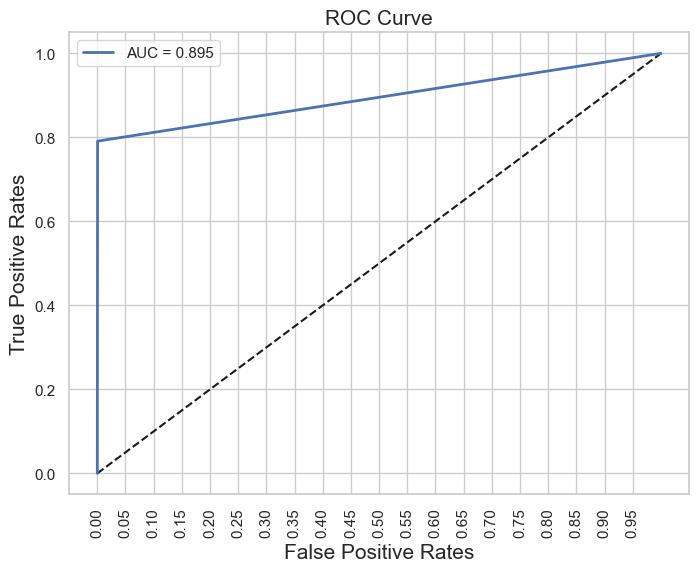

In [55]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % dt_auc)

### Random Forest

In [56]:
#random forest
rf_model = RandomForestClassifier()

In [57]:
rf_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [58]:
rf_pred_train = rf_model.predict(xtrain)
rf_pred_test = rf_model.predict(xtest)

In [59]:
tn, fp, fn, tp = confusion_matrix(ytest, rf_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,96,38
Not Fraud,5,84979


<Axes: >

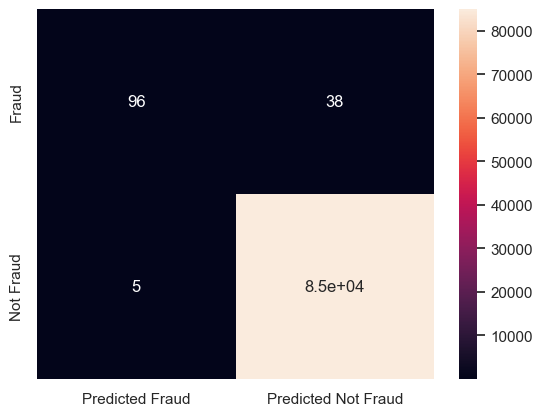

In [60]:
sns.heatmap(conf_matrix, annot=True)

In [61]:
rf_accuracy = accuracy_score(ytest, rf_pred_test)
rf_recall = recall_score(ytest, rf_pred_test)
rf_f1 = f1_score(ytest, rf_pred_test)

In [62]:
rf_precision = precision_score(ytest, rf_pred_test)

In [63]:
print("---------- classification report of random forest---------")
print(classification_report(ytest, test))

print("-----------------Accuracy of random forest----------------")
print(f"Accuracy:- {rf_accuracy}")
print(f"Precision:- {rf_precision}")
print(f"Recall:- {rf_recall}")
print(f"F1-Score:- {rf_f1}")

---------- classification report of random forest---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.79      0.58      0.67       134

    accuracy                           1.00     85118
   macro avg       0.89      0.79      0.83     85118
weighted avg       1.00      1.00      1.00     85118

-----------------Accuracy of random forest----------------
Accuracy:- 0.9994948189572124
Precision:- 0.9504950495049505
Recall:- 0.7164179104477612
F1-Score:- 0.8170212765957447


In [64]:
rf_pred_test_prob = rf_model.predict_proba(xtest)[:, 1]

In [65]:
fpr, tpr, threshold = roc_curve(ytest, rf_pred_test_prob)

In [66]:
rf_auc = roc_auc_score(ytest, rf_pred_test_prob)
rf_auc

0.9345346481374546

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

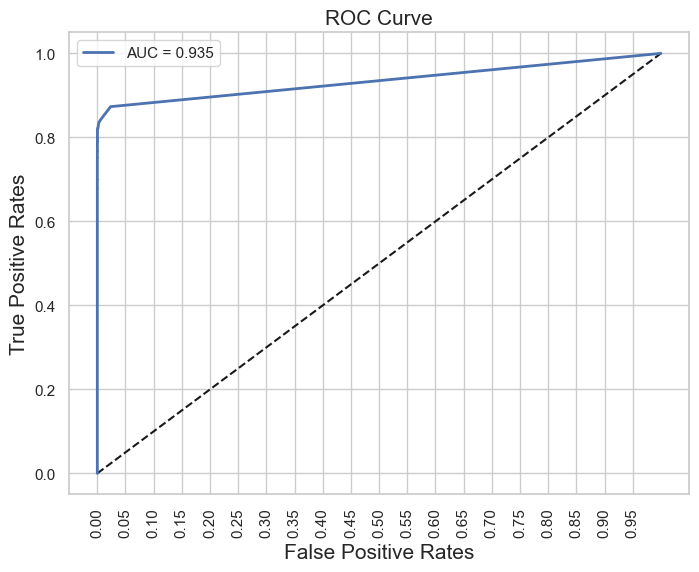

In [68]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % rf_auc)

### KNN

In [69]:
knn_model = KNeighborsClassifier()

In [70]:
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [71]:
knn_train=knn_model.predict(xtrain)
knn_test=knn_model.predict(xtest)

In [72]:
tn, fp, fn, tp = confusion_matrix(ytest, knn_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,4,130
Not Fraud,1,84983


<Axes: >

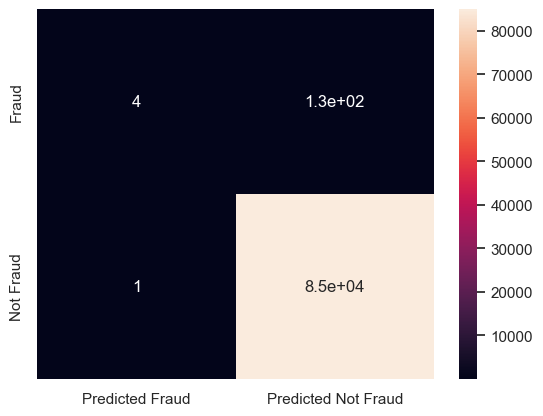

In [73]:
sns.heatmap(conf_matrix, annot=True)

In [74]:
knn_accuracy = accuracy_score(ytest, knn_test)
knn_precision=precision_score(ytest,knn_test)
knn_recall=recall_score(ytest,knn_test)
knn_f1=f1_score(ytest,knn_test)

In [75]:
print("---------- classification report of KNN---------")
print(classification_report(ytest, test))

print("-----------------Accuracy of KNN----------------")
print(f"Accuracy:- {knn_accuracy}")
print(f"Precision:- {knn_precision}")
print(f"Recall:- {knn_recall}")
print(f"F1-Score:- {knn_f1}")

---------- classification report of KNN---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.79      0.58      0.67       134

    accuracy                           1.00     85118
   macro avg       0.89      0.79      0.83     85118
weighted avg       1.00      1.00      1.00     85118

-----------------Accuracy of KNN----------------
Accuracy:- 0.9984609600789492
Precision:- 0.8
Recall:- 0.029850746268656716
F1-Score:- 0.05755395683453237


In [76]:
knn_pred_test_prob = knn_model.predict_proba(xtest)[:, 1]

In [77]:
fpr, tpr, threshold = roc_curve(ytest, knn_pred_test_prob) 

In [78]:
knn_auc = roc_auc_score(ytest, knn_pred_test_prob)
knn_auc

0.5957400146261069

In [79]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

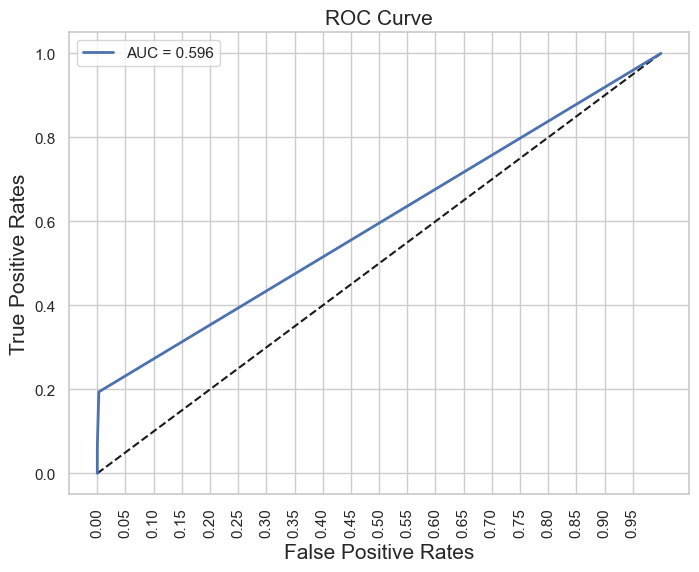

In [80]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % knn_auc)

### CNN

In [81]:
# Model architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(units=64, activation='relu'),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])

In [82]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest), callbacks=[early_stopping])

Epoch 1/10
6207/6207 [==============================] - 70s 11ms/step - loss: 0.0184 - accuracy: 0.9957 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 2/10
6207/6207 [==============================] - 66s 11ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 3/10
6207/6207 [==============================] - 71s 11ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 4/10
6207/6207 [==============================] - 66s 11ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 5/10
6207/6207 [==============================] - 64s 10ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/10
6207/6207 [==============================] - 66s 11ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 7/10
6207/6207 [==============================] - 67s 11ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0034 -

In [84]:
# Evaluation
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2660/2660 [==============================] - 8s 3ms/step - loss: 0.0033 - accuracy: 0.9994
Test Loss: 0.003309164894744754
Test Accuracy: 0.9994125962257385


In [85]:
# Predictions and evaluation metrics
y_pred_prob = model.predict(xtest)
y_pred = (y_pred_prob > 0.5).astype(int)

2660/2660 [==============================] - 7s 3ms/step


In [86]:
# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[84967    17]
 [   33   101]]


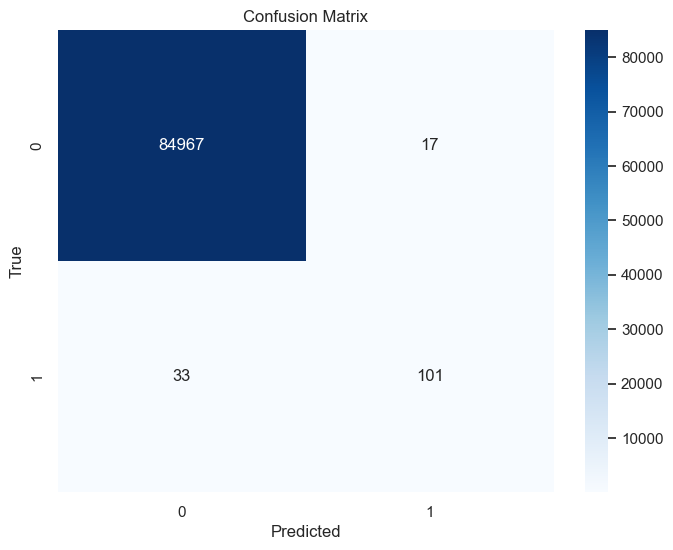

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [88]:
# Accuracy Score
acc_cm = accuracy_score(ytest, y_pred)
print("Accuracy:", acc_cm)

Accuracy: 0.9994125801828051


In [89]:
print("---------- classification report of CNN---------")
print(classification_report(ytest, test))

print("-----------------Accuracy of CNN----------------")
print(f"Accuracy:- {acc_cm}")

---------- classification report of CNN---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.79      0.58      0.67       134

    accuracy                           1.00     85118
   macro avg       0.89      0.79      0.83     85118
weighted avg       1.00      1.00      1.00     85118

-----------------Accuracy of CNN----------------
Accuracy:- 0.9994125801828051


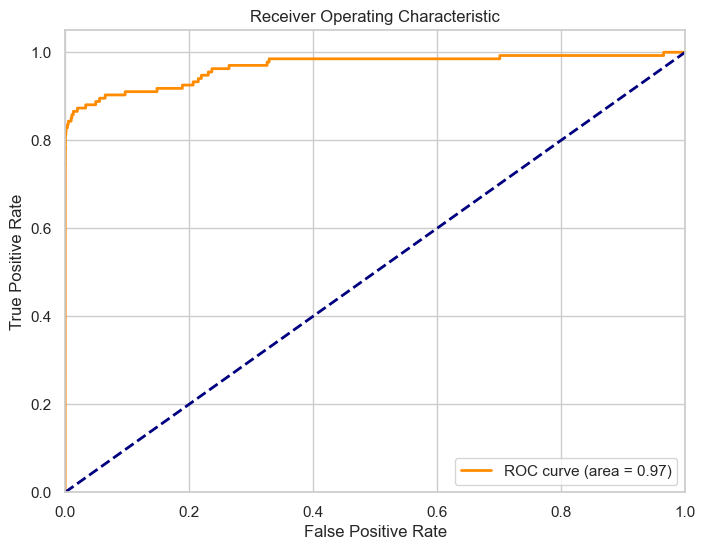

AUC Score: 0.9671487767319853


In [90]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC Score:", roc_auc)

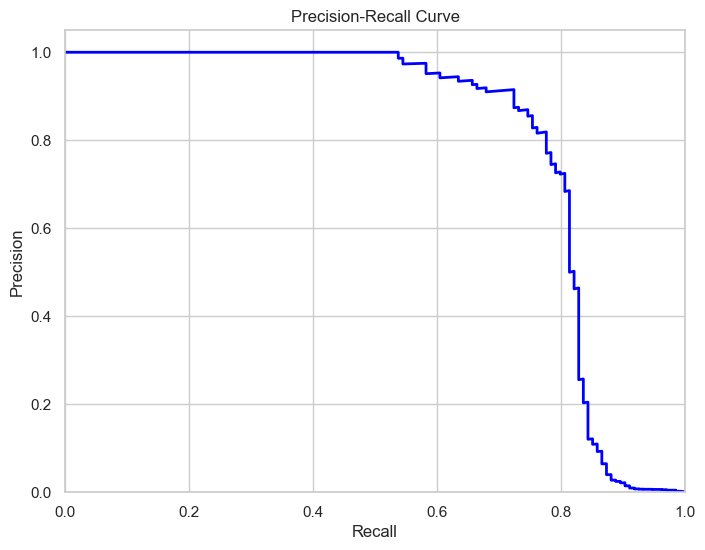

In [91]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ytest, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

Text(0, 0.5, 'Loss')

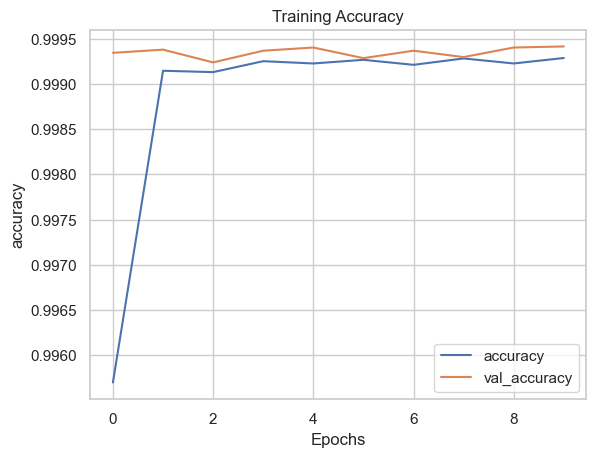

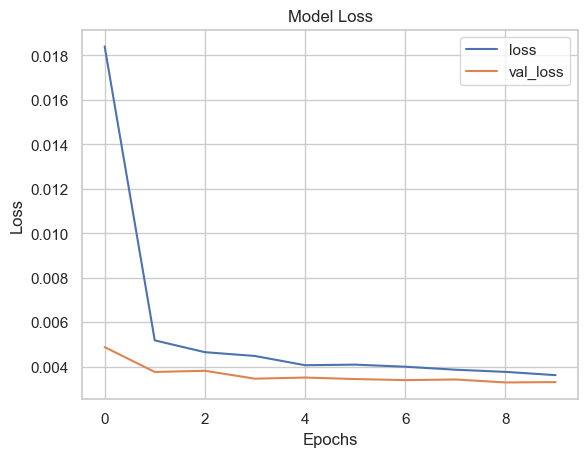

In [92]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')